In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv(r'C:\Users\ADMIN\Downloads\dataset.csv')

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['missing number', 'missing percent'])
    return missing_values
missing(data)

,missing number,missing percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [6]:
from sklearn.impute import SimpleImputer
fill = SimpleImputer(strategy='median')
data['bmi'] = fill.fit_transform(data['bmi'].to_numpy().reshape(-1, 1))
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
data.age[data.age<=20] = 0
data.age[(data.age<=40) & (data.age>20)] = 1
data.age[(data.age<=60) & (data.age>40)] = 2
data.age[data.age>60] = 3

In [11]:
data.smoking_status=[0 if item == "Unknown" else 1 if item=="never smoked" else 2 if item == "formerly smoked" else 3 for item in data.smoking_status]

In [12]:
data.Residence_type=[0 if item == "Urban" else 1 for item in data.Residence_type]
data.work_type=[0 if item == "Never_worked" else 1 if item=="children" else 2 if item == "Govt_job" else 3 if item == "Private" else 4 for item in data.work_type]
data.gender=[0 if item == "Male" else 1 for item in data.gender]
data.ever_married=[0 if item == "Yes" else 1 for item in data.ever_married]
data.bmi=[0 if item <=23.5 else 1 if item>23 and item<=28.1 else 2 if item >28.1 and item<=33.1 else 3 for item in data.bmi]
data.avg_glucose_level=[0 if item <=77.07 else 1 if item>77.07 and item<=91.68 else 2 if item >91.68 and item<=113.57 else 3 for item in data.avg_glucose_level]

In [13]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,3.0,0,1,0,3,0,3,3,2,1
1,51676,1,3.0,0,0,0,4,1,3,1,1,1
2,31112,0,3.0,0,1,0,3,1,2,2,1,1
3,60182,1,2.0,0,0,0,3,0,3,3,3,1
4,1665,1,3.0,1,0,0,4,1,3,1,1,1


In [14]:
data.drop("id",axis=1,inplace=True)

In [15]:
stroke = data[data.stroke==1]
not_stroke = data[data.stroke==0].sample(n = 1000,random_state=42)

In [16]:
stroke = data[data.stroke==1]

In [17]:
model_data=pd.concat([stroke,not_stroke])
y=model_data.stroke
x=model_data.drop("stroke",axis=1)

In [18]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,3.0,0,1,0,3,0,3,3,2
1,1,3.0,0,0,0,4,1,3,1,1
2,0,3.0,0,1,0,3,1,2,2,1
3,1,2.0,0,0,0,3,0,3,3,3
4,1,3.0,1,0,0,4,1,3,1,1


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [20]:
lr= linear_model.LogisticRegression(random_state = 42,max_iter= 100)

In [21]:
print("test accuracy: {} ".format(lr.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(lr.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.816 
train accuracy: 0.8146453089244852 


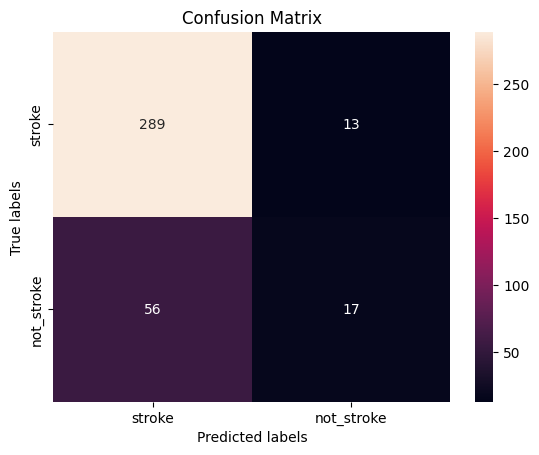

In [22]:
y_pred = lr.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['stroke','not_stroke']); ax.yaxis.set_ticklabels(['stroke','not_stroke']);

In [24]:
model = RandomForestClassifier ()
model.fit (x_train, y_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from matplotlib.pyplot import plot, show
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, cohen_kappa_score, matthews_corrcoef, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_pred = model.predict (X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1_score)
print('Recall:', recall)
print('Precision:', precision)
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
print("MCC:", mcc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.92
F1 score: 0.7872340425531914
Recall: 0.7115384615384616
Precision: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       198
           1       0.88      0.71      0.79        52

    accuracy                           0.92       250
   macro avg       0.90      0.84      0.87       250
weighted avg       0.92      0.92      0.92       250

ROC AUC: 0.8431429681429681
Confusion Matrix:
 [[193   5]
 [ 15  37]]
AUC Score: 0.8431429681429681
MSE: 0.08
G-mean: 0.8328086926601562
Kappa: 0.738657746184403
MCC: 0.7450459417605333
Confusion Matrix:
 [[193   5]
 [ 15  37]]


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from matplotlib.pyplot import plot, show
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, cohen_kappa_score, matthews_corrcoef, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

In [43]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, cohen_kappa_score, matthews_corrcoef, f1_score
catboost_classifier = CatBoostClassifier(n_estimators=10, learning_rate=0.05, depth=10)
catboost_classifier.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_pred = catboost_classifier.predict (X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
accuracy = accuracy_score(y_test, y_pred)
print('ac',accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
print("MCC:", mcc)
print("Confusion Matrix:\n", conf_matrix)

0:	learn: 0.6714309	total: 823us	remaining: 7.41ms
1:	learn: 0.6515435	total: 1.81ms	remaining: 7.25ms
2:	learn: 0.6341915	total: 3.33ms	remaining: 7.78ms
3:	learn: 0.6223068	total: 5.94ms	remaining: 8.92ms
4:	learn: 0.6119589	total: 8.06ms	remaining: 8.06ms
5:	learn: 0.6023477	total: 10.6ms	remaining: 7.04ms
6:	learn: 0.5919638	total: 11.5ms	remaining: 4.92ms
7:	learn: 0.5790277	total: 12.4ms	remaining: 3.11ms
8:	learn: 0.5702093	total: 14.9ms	remaining: 1.66ms
9:	learn: 0.5605222	total: 17.2ms	remaining: 0us
Accuracy: 0.836
F1 score: 0.27272727272727276
Recall: 0.16666666666666666
Precision: 0.75
ac 0.808
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       196
           1       0.75      0.17      0.27        54

    accuracy                           0.81       250
   macro avg       0.78      0.58      0.58       250
weighted avg       0.80      0.81      0.76       250

Confusion Matrix:
 [[193   3]
 [ 4

In [51]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, mean_squared_error, roc_auc_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
accuracy = accuracy_score(y_test, y_pred)
print('ac',accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
print("MCC:", mcc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.796
F1 score: 0.33766233766233766
Recall: 0.2549019607843137
Precision: 0.5
ac 0.796
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       199
           1       0.50      0.25      0.34        51

    accuracy                           0.80       250
   macro avg       0.67      0.59      0.61       250
weighted avg       0.76      0.80      0.77       250

Confusion Matrix:
 [[186  13]
 [ 38  13]]
AUC Score: 0.5947876638092424
MSE: 0.204
G-mean: 0.48810867017387255
Kappa: 0.23183516086275446
MCC: 0.2502549971294267
Confusion Matrix:
 [[186  13]
 [ 38  13]]


In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error, cohen_kappa_score, matthews_corrcoef, accuracy_score
import numpy as np

# Assuming X_train, y_train, X_test, y_test are available

# Calculate class weights
class_weights = dict(zip(np.unique(y_train), len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))))

svm = SVC(kernel='rbf', C=1.0, gamma=0.1, class_weight=class_weights)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
print("MCC:", mcc)


Accuracy: 0.78
F1 score: 0.5925925925925926
Recall: 0.7843137254901961
Precision: 0.47619047619047616
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       199
           1       0.48      0.78      0.59        51

    accuracy                           0.78       250
   macro avg       0.70      0.78      0.72       250
weighted avg       0.84      0.78      0.80       250

Confusion Matrix:
 [[155  44]
 [ 11  40]]
AUC Score: 0.7816040989260025
MSE: 0.22
G-mean: 0.7815994021119841
Kappa: 0.45397506155190215
MCC: 0.4804928248898816


In [55]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, roc_auc_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)    
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
accuracy = accuracy_score(y_test, y_pred)
print('ac',accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
print("MCC:", mcc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.788
F1 score: 0.4536082474226804
Recall: 0.43137254901960786
Precision: 0.4782608695652174
ac 0.788
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       199
           1       0.48      0.43      0.45        51

    accuracy                           0.79       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.78      0.79      0.78       250

Confusion Matrix:
 [[175  24]
 [ 29  22]]
AUC Score: 0.6553847669721155
MSE: 0.212
G-mean: 0.6159121032964788
Kappa: 0.3225278658349524
MCC: 0.32318862225684414
Confusion Matrix:
 [[175  24]
 [ 29  22]]


Accuracy: 0.74
F1 score: 0.2857142857142857
Recall: 0.24074074074074073
Precision: 0.35135135135135137
Acuuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       199
           1       0.48      0.43      0.45        51

    accuracy                           0.79       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.78      0.79      0.78       250

AUC Score: 0.5591458805744519
MSE: 0.26
G-mean: 0.45963276938318276
Kappa: 0.13351818278767202


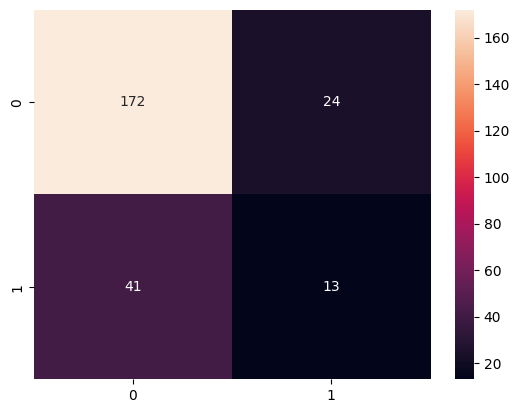

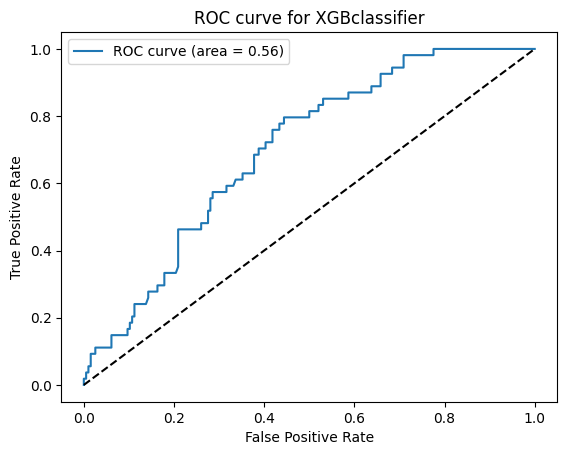

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, matthews_corrcoef, mean_squared_error, roc_curve, roc_auc_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Acuuracy:",accuracy)

sns.heatmap(conf_matrix, annot=True, fmt=".0f")
print("Classification Report:\n", report)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBclassifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.show()

Accuracy: 0.82
F1 score: 0.4
Recall: 0.2777777777777778
Precision: 0.7142857142857143
Acuuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       199
           1       0.48      0.43      0.45        51

    accuracy                           0.79       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.78      0.79      0.78       250

AUC Score: 0.6235827664399093
MSE: 0.18
G-mean: 0.5189165408976992
Kappa: 0.3174372042227884


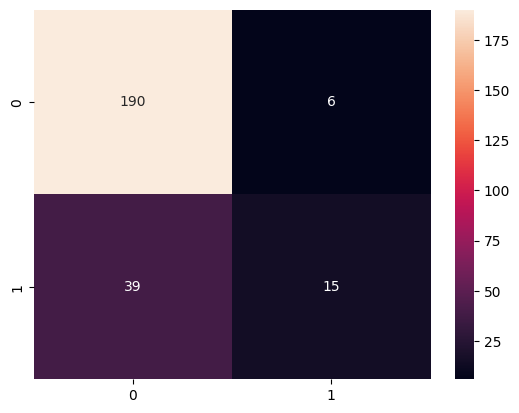

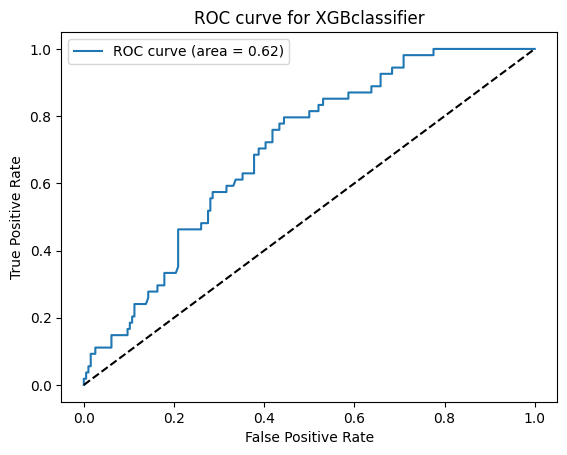

In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Acuuracy:",accuracy)

sns.heatmap(conf_matrix, annot=True, fmt=".0f")
print("Classification Report:\n", report)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBclassifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.show()

Acuuracy: 0.8
Accuracy: 0.8
F1 score: 0.358974358974359
Recall: 0.30434782608695654
Precision: 0.4375
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       204
           1       0.44      0.30      0.36        46

    accuracy                           0.80       250
   macro avg       0.65      0.61      0.62       250
weighted avg       0.78      0.80      0.79       250

AUC Score: 0.6080562659846547
MSE: 0.2
G-mean: 0.5267766188225398
Kappa: 0.24498671176612707
MCC: 0.2506517350109783


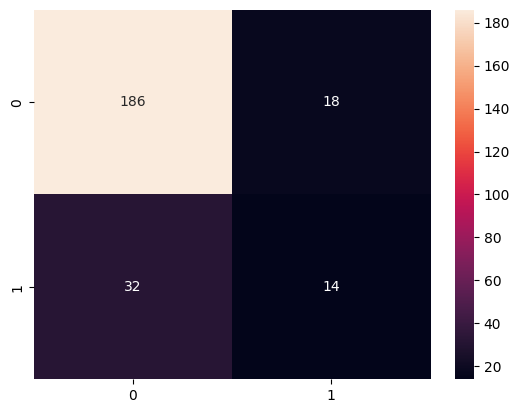

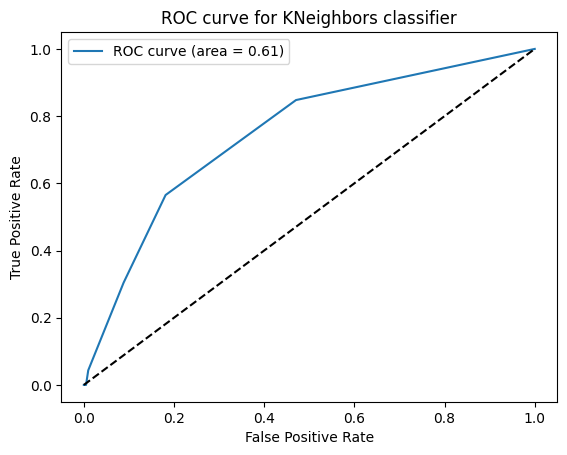

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, mean_squared_error, roc_auc_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = KNeighborsClassifier ()
model.fit (X_train, y_train)
y_pred = model.predict (X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
g_mean = (sensitivity * specificity)**0.5
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Acuuracy:",accuracy)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
print("Classification Report:\n", report)
print("AUC Score:", auc_score)
print("MSE:", mse)
print("G-mean:", g_mean)
print("Kappa:", kappa)
print("MCC:", mcc)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNeighbors classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.show()

Accuracy: 0.808
F1 score: 0.39999999999999997
Recall: 0.34782608695652173
Precision: 0.47058823529411764
Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       204
           1       0.47      0.35      0.40        46

    accuracy                           0.81       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.79      0.81      0.80       250

Kappa: 0.28876244665718354
MCC: 0.29343840293572665
MSE: 0.192
G-mean: 0.5267766188225398
ROC AUC score: 0.6297953964194374


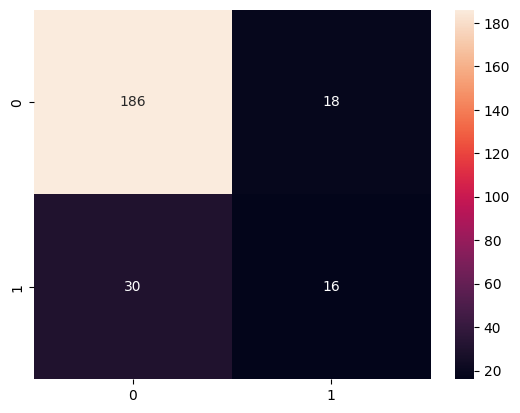

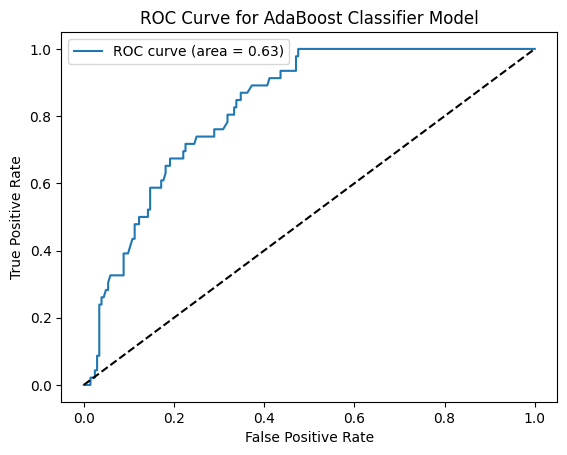

In [60]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, matthews_corrcoef, mean_squared_error, roc_auc_score

clf = AdaBoostClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
def geometric_mean_score(y_true, y_pred):
 g_mean = np.prod(np.sqrt(y_pred * y_true))
roc_auc = roc_auc_score(y_test, y_pred)

confusion_matrix = confusion_matrix(y_test, y_pred)
acc = round(accuracy_score(y_test, y_pred), 3)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
sns.heatmap(confusion_matrix, annot=True, fmt=".0f")

print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))
print('Kappa:', kappa)
print('MCC:', mcc)
print('MSE:', mse)
print('G-mean:', g_mean)
print('ROC AUC score:', roc_auc)

plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Classifier Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()